# Task
Dari data csv (output big query) tersebut, analisislah perbandingan
1.	laba rugi setelah pajak setiap tahun (dari tahun 2020 hingga 2026) skenario normal, skenario tax holiday, skenario garis lurus, dan skenario saldo menurun; sehingga setiap tahunnya ada 4 diagram batang. Sumbu X berupa tahun, Sumbu Y berupa Laba Setelah Pajak (Rp).
2.	laba sebelum pajak, pph badan, dan laba setelah pajak setiap tahunnya (dari tahun 2020 hingga 2026) untuk masing-masing skenario (yaitu skenario normal, skenario tax holiday, skenario garis lurus, dan skenario saldo menurun); sehingga total hasil visualisasi diagram batangnya ada 4 sesuai dengan jumlah skenario yang ada. Sumbu X berupa tahun, Sumbu Y berupa Rupiah (karena diagram batangnya ada Laba sebelum pajak, Laba setelah pajak, dan PPh badan).
3.	arus kas setelah pajak setiap tahunnya (dari tahun 2020 hingga 2026) untuk masing-masing skenario normal, skenario tax holiday, skenario garis lurus, dan skenario saldo menurun; sehingga setiap tahunnya ada 4 diagram batang. Sumbu X berupa tahun, Sumbu Y berupa Arus Kas Setelah Pajak (Rp).
Hasil visualisasi diagram batang diurutkan dari tahun 2020 hingga 2026. Visualisasikan dengan diagram batang yang colorful, namun tetap nyaman dilihat dan diagram batangnya tidak terpotong/terhalangi oleh garis-garis bantu sumbu x dan sumbu y.


Here is all the data you need:
"Perbandingan_Laba_Setelah_Pajak_Setiap_Skenario.csv"

## Data loading

### Subtask:
Load the data from "Perbandingan_Laba_Setelah_Pajak_Setiap_Skenario.csv" into a dataframe.


**Reasoning**:
Load the data from the CSV file into a pandas DataFrame and display the head and info to inspect it.



In [1]:
import pandas as pd

df = pd.read_csv("Perbandingan_Laba_Setelah_Pajak_Setiap_Skenario.csv")

display(df.head())
display(df.info())

,tahun,pendapatan,beban_operasional,penyusutan_normal,skenario_normal,tax_rate_normal,laba_bersih_sebelum_pajak_normal,pph_badan_normal,laba_bersih_setelah_pajak_normal,arus_kas_normal,...,pph_badan_garis_lurus,laba_bersih_setelah_pajak_garis_lurus,arus_kas_garis_lurus,metode_saldo_menurun,penyusutan_saldo_menurun,tax_rate_saldo_menurun,laba_bersih_sebelum_pajak_saldo_menurun,pph_badan_saldo_menurun,laba_bersih_setelah_pajak_saldo_menurun,arus_kas_saldo_menurun
0,2020,1000000000,600000000,50000000,Normal,0.25,350000000,87500000,262500000,312500000,...,87500000,262500000,312500000,Saldo Menurun,100000000,0.25,300000000,75000000,225000000,325000000
1,2021,1200000000,700000000,55000000,Normal,0.22,445000000,97900000,347100000,402100000,...,97900000,347100000,402100000,Saldo Menurun,110000000,0.22,390000000,85800000,304200000,414200000
2,2022,1500000000,800000000,60000000,Normal,0.22,640000000,140800000,499200000,559200000,...,140800000,499200000,559200000,Saldo Menurun,120000000,0.22,580000000,127600000,452400000,572400000
3,2023,1400000000,750000000,58000000,Normal,0.20,592000000,118400000,473600000,531600000,...,118400000,473600000,531600000,Saldo Menurun,116000000,0.20,534000000,106800000,427200000,543200000
4,2024,1600000000,820000000,62000000,Normal,0.20,718000000,143600000,574400000,636400000,...,143600000,574400000,636400000,Saldo Menurun,124000000,0.20,656000000,131200000,524800000,648800000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 33 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tahun                                    7 non-null      int64  
 1   pendapatan                               7 non-null      int64  
 2   beban_operasional                        7 non-null      int64  
 3   penyusutan_normal                        7 non-null      int64  
 4   skenario_normal                          7 non-null      object 
 5   tax_rate_normal                          7 non-null      float64
 6   laba_bersih_sebelum_pajak_normal         7 non-null      int64  
 7   pph_badan_normal                         7 non-null      int64  
 8   laba_bersih_setelah_pajak_normal         7 non-null      int64  
 9   arus_kas_normal                          7 non-null      int64  
 10  skenario_tax_holiday                     7 non-null   

None

## Data cleaning

### Subtask:
Ensure the data is in the correct format for analysis, particularly the financial values and year columns.


**Reasoning**:
Convert the 'tahun' column to integer and identify and convert financial columns to numeric format by removing non-numeric characters. Then, verify the data types.



In [2]:
df['tahun'] = df['tahun'].astype(int)

financial_cols = [col for col in df.columns if any(keyword in col for keyword in ['pendapatan', 'beban_operasional', 'penyusutan', 'laba_bersih_sebelum_pajak', 'pph_badan', 'laba_bersih_setelah_pajak', 'arus_kas'])]

for col in financial_cols:
    # Remove any non-numeric characters (like commas or currency symbols if present)
    df[col] = df[col].astype(str).str.replace('[^\d.-]', '', regex=True)
    # Convert to numeric, coercing errors to NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')

display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 33 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tahun                                    7 non-null      int64  
 1   pendapatan                               7 non-null      int64  
 2   beban_operasional                        7 non-null      int64  
 3   penyusutan_normal                        7 non-null      int64  
 4   skenario_normal                          7 non-null      object 
 5   tax_rate_normal                          7 non-null      float64
 6   laba_bersih_sebelum_pajak_normal         7 non-null      int64  
 7   pph_badan_normal                         7 non-null      int64  
 8   laba_bersih_setelah_pajak_normal         7 non-null      int64  
 9   arus_kas_normal                          7 non-null      int64  
 10  skenario_tax_holiday                     7 non-null   

None

## Data visualization

### Subtask:
Create bar charts to visualize the comparison of profit after tax for each year (2020-2026) across the four scenarios (Normal, Tax Holiday, Garis Lurus, Saldo Menurun). Each year should have four bars representing the four scenarios, with the X-axis as Year and Y-axis as Laba Setelah Pajak (Rp).


**Reasoning**:
Import the necessary libraries for plotting and data manipulation.



In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

**Reasoning**:
Melt the DataFrame to long format for easier plotting and then create the bar chart to visualize the comparison of profit after tax for each year and scenario.



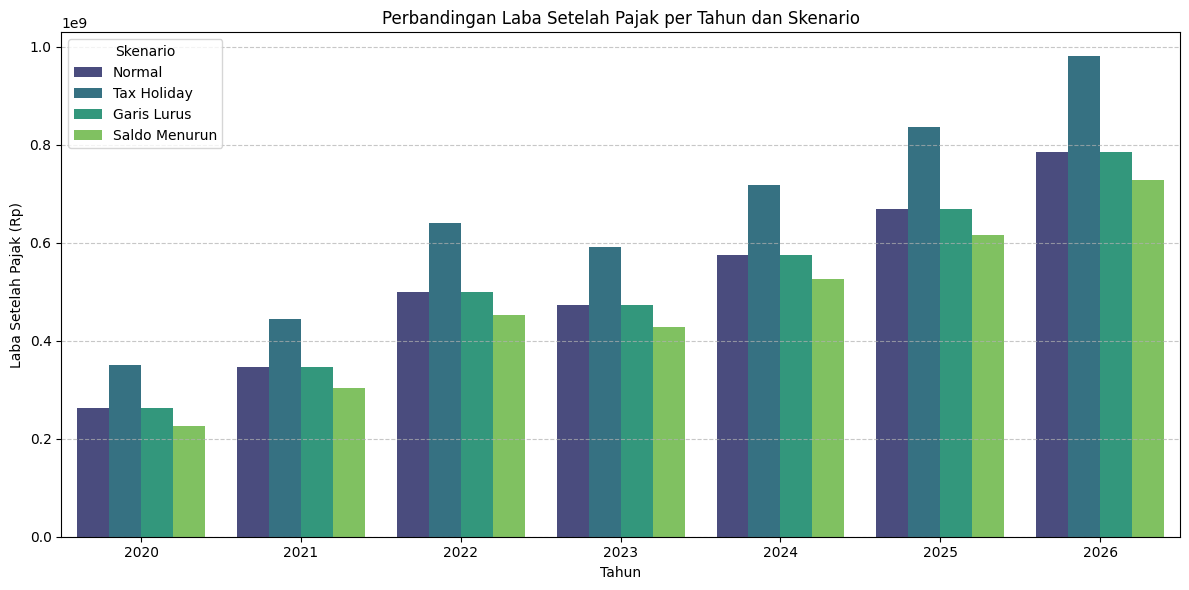

In [4]:
df_melted = df.melt(
    id_vars='tahun',
    value_vars=[
        'laba_bersih_setelah_pajak_normal',
        'laba_bersih_setelah_pajak_tax_holiday',
        'laba_bersih_setelah_pajak_garis_lurus',
        'laba_bersih_setelah_pajak_saldo_menurun'
    ],
    var_name='Skenario',
    value_name='Laba Setelah Pajak (Rp)'
)

# Map melted column names to more readable scenario names
scenario_map = {
    'laba_bersih_setelah_pajak_normal': 'Normal',
    'laba_bersih_setelah_pajak_tax_holiday': 'Tax Holiday',
    'laba_bersih_setelah_pajak_garis_lurus': 'Garis Lurus',
    'laba_bersih_setelah_pajak_saldo_menurun': 'Saldo Menurun'
}
df_melted['Skenario'] = df_melted['Skenario'].map(scenario_map)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='tahun', y='Laba Setelah Pajak (Rp)', hue='Skenario', palette='viridis')

plt.title('Perbandingan Laba Setelah Pajak per Tahun dan Skenario')
plt.xlabel('Tahun')
plt.ylabel('Laba Setelah Pajak (Rp)')
plt.xticks(rotation=0) # Ensure years are horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a subtle grid on y-axis

plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

## Data visualization

### Subtask:
Create bar charts to visualize the comparison of profit before tax, corporate tax, and profit after tax for each year (2020-2026) for each scenario. There should be four separate charts, one for each scenario. Each chart will have Year on the X-axis and Rupiah on the Y-axis, with bars for Laba Sebelum Pajak, PPh Badan, and Laba Setelah Pajak.


**Reasoning**:
Loop through each scenario, melt the relevant columns, map the column names, create a bar plot for the scenario, set titles and labels, and display the plot.



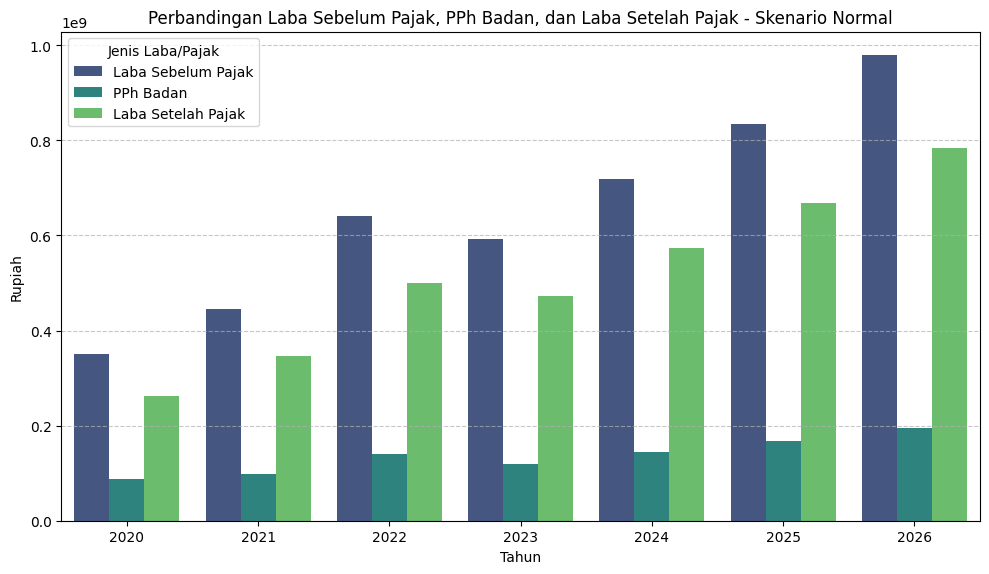

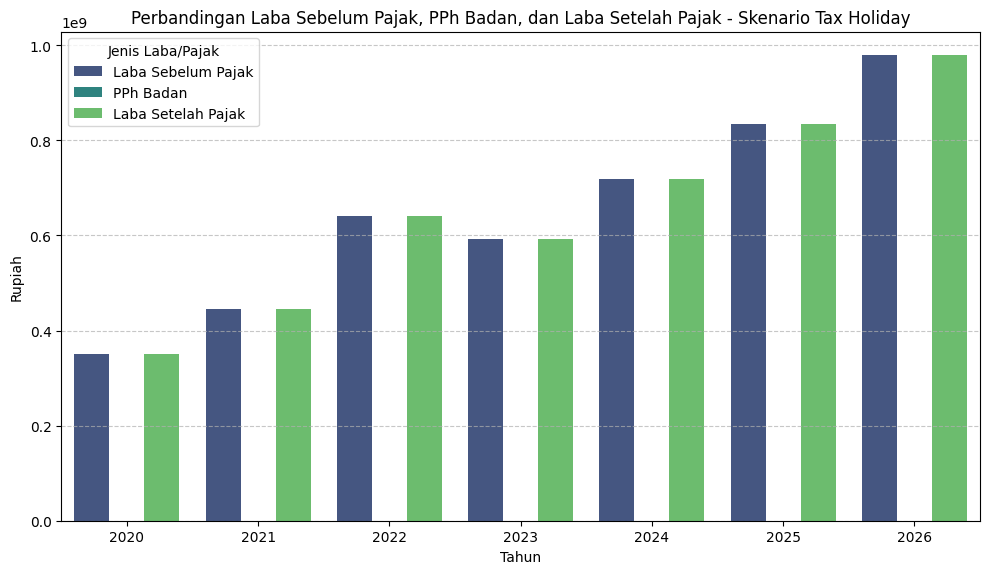

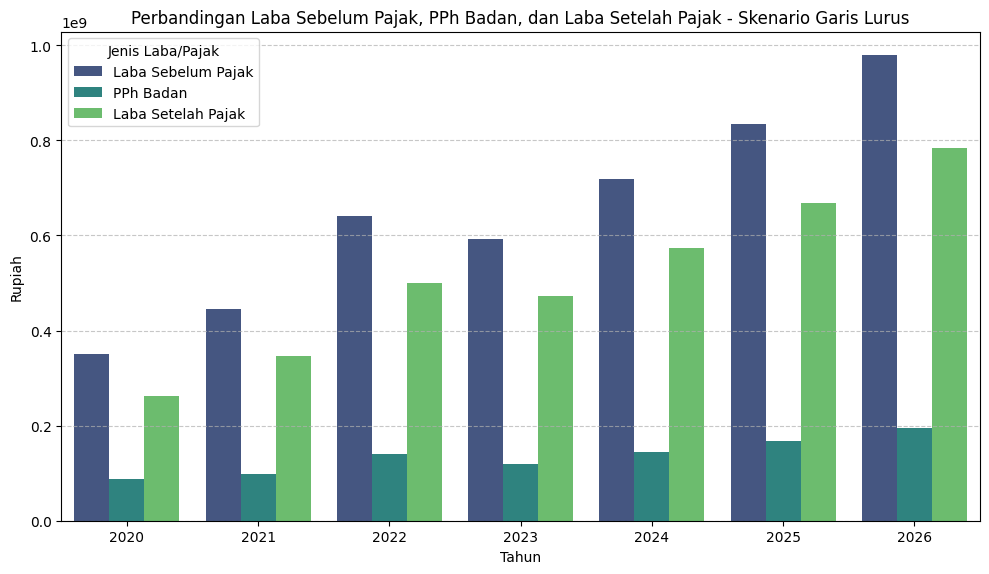

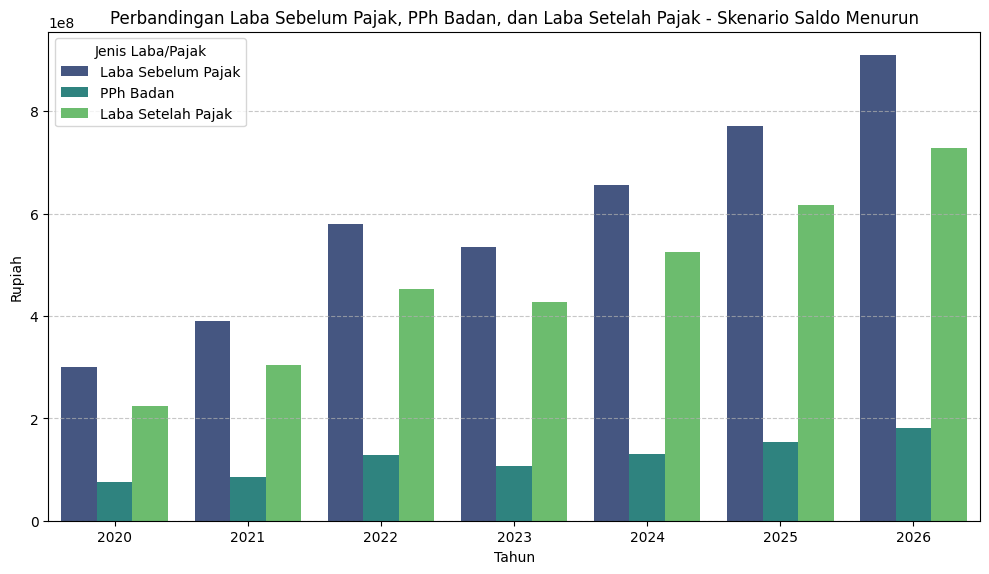

In [5]:
scenarios = ['normal', 'tax_holiday', 'garis_lurus', 'saldo_menurun']

for scenario in scenarios:
    # Construct column names for the current scenario
    laba_sebelum_pajak_col = f'laba_bersih_sebelum_pajak_{scenario}'
    pph_badan_col = f'pph_badan_{scenario}'
    laba_setelah_pajak_col = f'laba_bersih_setelah_pajak_{scenario}'

    # Melt the relevant columns for the current scenario
    df_scenario_melted = df.melt(
        id_vars='tahun',
        value_vars=[laba_sebelum_pajak_col, pph_badan_col, laba_setelah_pajak_col],
        var_name='Jenis Laba/Pajak',
        value_name='Rupiah'
    )

    # Map the values in the 'Jenis Laba/Pajak' column to more readable names
    jenis_map = {
        laba_sebelum_pajak_col: 'Laba Sebelum Pajak',
        pph_badan_col: 'PPh Badan',
        laba_setelah_pajak_col: 'Laba Setelah Pajak'
    }
    df_scenario_melted['Jenis Laba/Pajak'] = df_scenario_melted['Jenis Laba/Pajak'].map(jenis_map)

    # Create a figure and axes for the bar chart
    plt.figure(figsize=(10, 6))

    # Generate a bar plot
    sns.barplot(data=df_scenario_melted, x='tahun', y='Rupiah', hue='Jenis Laba/Pajak', palette='viridis')

    # Set the title of the chart
    scenario_name = scenario.replace('_', ' ').title()
    plt.title(f'Perbandingan Laba Sebelum Pajak, PPh Badan, dan Laba Setelah Pajak - Skenario {scenario_name}')

    # Set the x-axis label
    plt.xlabel('Tahun')

    # Set the y-axis label
    plt.ylabel('Rupiah')

    # Ensure the x-axis ticks are horizontal
    plt.xticks(rotation=0)

    # Add a subtle grid on the y-axis
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Adjust the layout to prevent labels overlapping
    plt.tight_layout()

    # Display the plot
    plt.show()

## Data visualization

### Subtask:
Create bar charts to visualize the comparison of after-tax cash flow for each year (2020-2026) across the four scenarios (Normal, Tax Holiday, Garis Lurus, Saldo Menurun). Each year should have four bars representing the four scenarios, with the X-axis as Year and Y-axis as Arus Kas Setelah Pajak (Rp).


**Reasoning**:
Melt the dataframe to prepare it for plotting after-tax cash flow comparisons across scenarios.



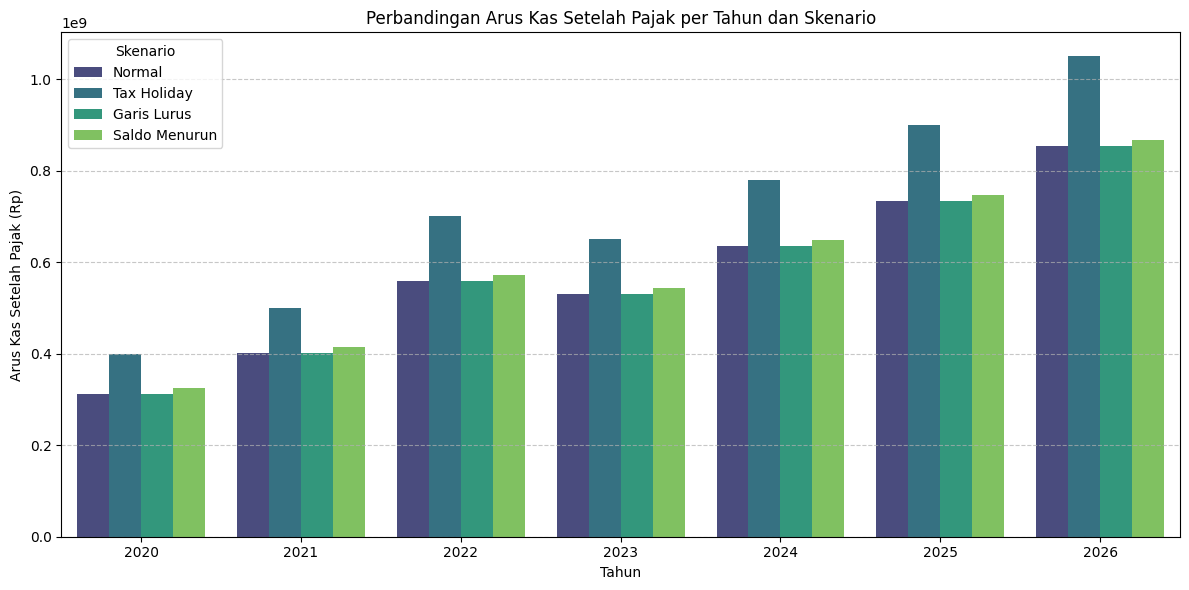

In [6]:
df_cashflow_melted = df.melt(
    id_vars='tahun',
    value_vars=[
        'arus_kas_normal',
        'arus_kas_tax_holiday',
        'arus_kas_garis_lurus',
        'arus_kas_saldo_menurun'
    ],
    var_name='Skenario',
    value_name='Arus Kas Setelah Pajak (Rp)'
)

# Map melted column names to more readable scenario names
scenario_map_cashflow = {
    'arus_kas_normal': 'Normal',
    'arus_kas_tax_holiday': 'Tax Holiday',
    'arus_kas_garis_lurus': 'Garis Lurus',
    'arus_kas_saldo_menurun': 'Saldo Menurun'
}
df_cashflow_melted['Skenario'] = df_cashflow_melted['Skenario'].map(scenario_map_cashflow)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_cashflow_melted, x='tahun', y='Arus Kas Setelah Pajak (Rp)', hue='Skenario', palette='viridis')

plt.title('Perbandingan Arus Kas Setelah Pajak per Tahun dan Skenario')
plt.xlabel('Tahun')
plt.ylabel('Arus Kas Setelah Pajak (Rp)')
plt.xticks(rotation=0) # Ensure years are horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a subtle grid on y-axis

plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

## Summary:

### Data Analysis Key Findings

*   The analysis successfully visualized the comparison of Laba Setelah Pajak (Profit After Tax) for four scenarios (Normal, Tax Holiday, Garis Lurus, and Saldo Menurun) from 2020 to 2026, showing how different tax and depreciation methods impact profitability.
*   Separate visualizations were created for each scenario, detailing the breakdown of Laba Sebelum Pajak (Profit Before Tax), PPh Badan (Corporate Tax), and Laba Setelah Pajak (Profit After Tax) over the years, highlighting the tax impact within each scenario.
*   The analysis also visualized the comparison of Arus Kas Setelah Pajak (After-Tax Cash Flow) across the four scenarios from 2020 to 2026, illustrating the cash flow performance under each condition.
*   Financial columns were successfully cleaned and converted to a numeric format, and the 'tahun' column was ensured to be an integer, preparing the data for accurate plotting.

### Insights or Next Steps

*   The visualizations provide a clear basis for comparing the financial outcomes of different tax and depreciation strategies, allowing stakeholders to evaluate which scenario yields the most favorable results in terms of profit and cash flow over the projected period.
*   Further analysis could delve into the specific years where the differences between scenarios are most pronounced and investigate the underlying drivers (e.g., the impact of the tax holiday period or specific depreciation schedules).
